In [69]:
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [57]:
# Latitude & Longitude input
Latitude = "35"
Longitude = "-10"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
#location[0].split(", ")[-1]
str(type(location)) == "<class 'geopy.location.Location'>"

False

In [75]:
lat_list = np.arange(45.75,52.25,0.25)
lon_list = np.arange(-10,50.25,0.25)
df_country = pd.DataFrame(columns=['lat','lon','country'])

for lat in lat_list:
    for lon in lon_list:
        location = geolocator.reverse(str(lat)+","+str(lon))
        if str(type(location)) == "<class 'geopy.location.Location'>":
            new_row = {'lat':lat, 'lon':lon, 'country':location[0].split(", ")[-1]}
            df_country = df_country.append(new_row, ignore_index=True)

df_country

/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_5655/2817403776.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_country = df_country.append(new_row, ignore_index=True)
/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_5655/2817403776.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_country = df_country.append(new_row, ignore_index=True)
/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_5655/2817403776.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_country = df_country.append(new_row, ignore_index=True)
/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_5655/2817403776.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

,lat,lon,country
0,45.75,-1.50,France
1,45.75,-1.25,France
2,45.75,-1.00,France
3,45.75,-0.75,France
4,45.75,-0.50,France
...,...,...,...
5575,52.00,49.00,Россия
5576,52.00,49.25,Россия
5577,52.00,49.50,Россия
5578,52.00,49.75,Россия


In [76]:
df_country

,lat,lon,country
0,45.75,-1.50,France
1,45.75,-1.25,France
2,45.75,-1.00,France
3,45.75,-0.75,France
4,45.75,-0.50,France
...,...,...,...
5575,52.00,49.00,Россия
5576,52.00,49.25,Россия
5577,52.00,49.50,Россия
5578,52.00,49.75,Россия


In [77]:
df_all = df_firstpart.append(df_country, ignore_index=True)

/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_5655/282073662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_firstpart.append(df_country, ignore_index=True)


In [79]:
df_all = df_all.drop_duplicates()
df_all

,lat,lon,country
0,33.0,-9.00,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
1,33.0,-8.75,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
2,33.0,-8.50,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
3,33.0,-8.25,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
4,33.0,-8.00,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
...,...,...,...
14182,52.0,49.00,Россия
14183,52.0,49.25,Россия
14184,52.0,49.50,Россия
14185,52.0,49.75,Россия


In [26]:
76*240

18240

In [74]:
df_firstpart

,lat,lon,country
0,33.00,-9.00,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
1,33.00,-8.75,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
2,33.00,-8.50,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
3,33.00,-8.25,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
4,33.00,-8.00,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
...,...,...,...
8602,45.75,48.00,Россия
8603,45.75,48.25,Россия
8604,45.75,48.50,Россия
8605,45.75,48.75,Россия


In [81]:
df_all.to_csv('../data/country_all.csv')

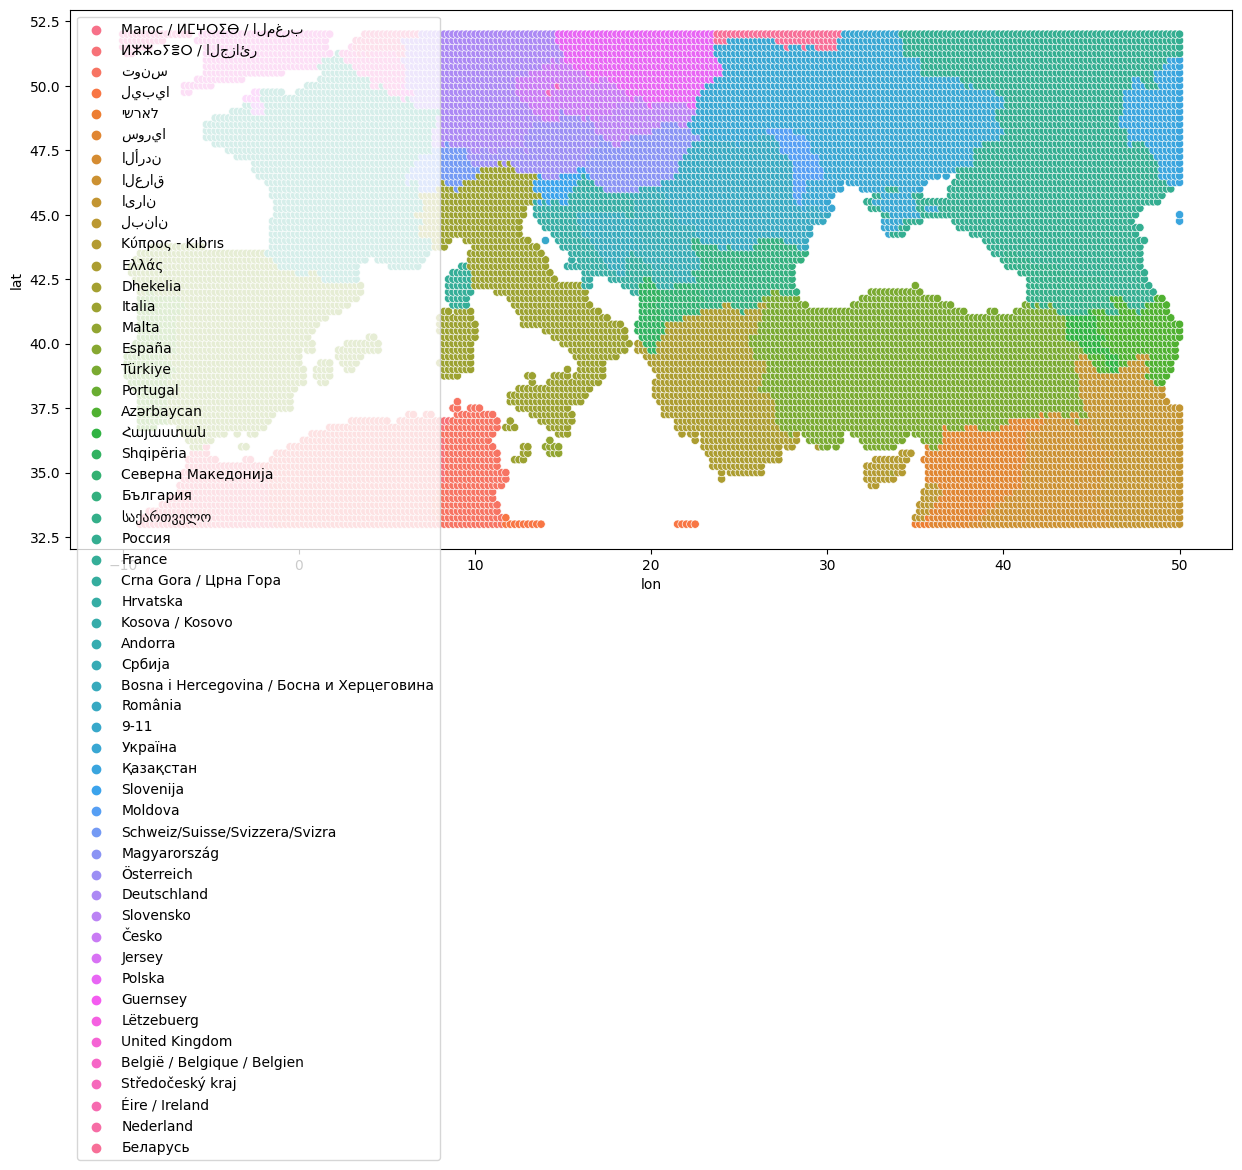

In [82]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_all, x='lon', y='lat', hue = 'country')
plt.legend(loc='upper left');

In [ ]:
import geopandas
from functools import partial
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata

gdf = geopandas.GeoDataFrame(
    df_all, geometry=geopandas.points_from_xy(df_all['lon'], df_all['lat']), crs="EPSG:4326",
    )
geo_grid_linear = make_geocube(
        gdf,
        measurements=["dry_days"],
        resolution=(-0.25, 0.25),
        rasterize_function=partial(rasterize_points_griddata, method="linear"),
        interpolate_na_method="nearest",
    )
geo_grid_linear